Цель: повернуть координатные оси так что бы дисперсия данных вдоль новых осей стала максимальной.

Для поворота осей используется: [базис](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B7%D0%B8%D1%81) и [линейные отображения](http://mathhelpplanet.com/static.php?p=linyeinye-otobrazheniya).


При этом осей может стать меньше.


Поворот определяется `базисными векторами` которые:

* единичны
* ортогональны друг другу


? координаты этих векторов задаются в координатной системе изначального пространства.

### Пример смены базиса или поворота координатных осей

Данные. Каждая строка в таблице представляет собой результаты эксперимента. Соответственно в столбцах значения признаков.

In [10]:
import numpy as np
X = np.array([[2,1], [4,2]]) #Data


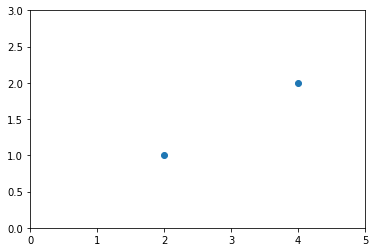

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
plt.xlim(0,5)
plt.ylim(0,3)
plt.show()


Мы хотим повернуть координатные оси. Например против часовой стрелки, так что бы точки оказались рядом с осью Х.

Как повернуть вектор в 2D описано в этой статье:
https://matthew-brett.github.io/teaching/rotation_2d.html

\begin{split}x_2 = \cos \beta x_1 - \sin \beta y_1 \\
y_2 = \sin \beta x_1 + \cos \beta y_1\end{split}

Суть сводиться к тому что каждая старая координата умножается на коеффициент и затем суммируется. Вместо косинсов и синусов можно ввести новые обохначения $e_x$

Тогда
\begin{split}x_2 = e_{1,1} x_1 + e_{1,2} y_1 \\
y_2 = e_{2,1} x_1 + e_{2,2} y_1\end{split}

Теперь можно переписать это выражение в матричной форме

 $e = \begin  {bmatrix}
 e_{1,1} & e_{1,2} \\
 e_{2,1} & e_{2,2} \\
\end{bmatrix}$

$[x_2,y_2] = e\cdot[x_1,y_1]^T$






In [41]:
import math 
b = -np.pi/4# 30 degree
e = np.array([
    [math.cos(b),-math.sin(b)],
    [math.sin(b), math.cos(b)]
    ])
print(e)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Теперь умножим старые координаты на эту матрицу (поворота)

In [42]:
print(X)
data_rot = e @ X.T
print(data_rot)


[[2 1]
 [4 2]]
[[ 2.12132034  4.24264069]
 [-0.70710678 -1.41421356]]


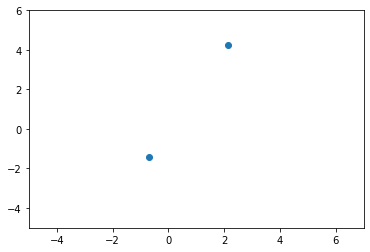

In [43]:
plt.scatter(data_rot[:,0],data_rot[:,1])
plt.xlim(-5,7)
plt.ylim(-5,6)
plt.show()

Делаем так что бы среднее значение в каждом столбце стало нулевым

In [4]:
import numpy as np
# Assume input data matrix X of size [N x D]
X -= np.mean(X, axis = 0) # zero-center the data (important)
print("Centered: \n",X)

Centered: 
 [[-1.  -0.5]
 [ 1.   0.5]]


Source: https://cs231n.github.io/neural-networks-2/#datapre
Ковариация https://wikimatik.ru/article/28
"Ковариация сл. величины собой есть ее Дисперсия"

### Ковариация:

$\mathrm {cov} _{XY}=\mathbf {M} \left[(X-\mathbf {M} (X))(Y-\mathbf {M} (Y))\right]=\mathbf {M} (XY)-\mathbf {M} (X)\mathbf {M} (Y)$

Выборочная ковариационная матрица:

${\displaystyle C = [c_{ij}],\ c_{ij} = \frac{1}{m-1} \sum_{l=1}^m (x_{li}-\overline{X_{i}})(x_{lj}-\overline{X_{j}}).}$

Ковариационная матрица:
${\displaystyle \Sigma =[\sigma _{ij}],\ \sigma _{ij}=\operatorname {cov} (X_{i},X_{j})=\operatorname {E} [(X_{i}-\operatorname {E} [X_{i}])(X_{j}-\operatorname {E} [X_{j}])].}$

In [ ]:

cov = np.dot(X.T, X) / X.shape[0] # get the data covariance matrix
print("Covariance matrix",cov)

Centered [[-1.  -0.5]
 [ 1.   0.5]]
Covariance matrix [[1.   0.5 ]
 [0.5  0.25]]


We can compute the SVD factorization of the data covariance matrix:

In [ ]:
U,S,V = np.linalg.svd(cov)
print("L-Eigenvectors",U)
print("Singular values",S)
print("R-Eigenvectors",V)


L-Eigenvectors [[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]
Singular values [1.25000000e+00 3.48046978e-18]
R-Eigenvectors [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


where the columns of U are the eigenvectors and S is a 1-D array of the singular values. To decorrelate the data, we project the original (but zero-centered) data into the eigenbasis:

In [ ]:
Xrot = np.dot(X, U) # decorrelate the data

In [ ]:
Xrot_reduced = np.dot(X, U[:,:100]) # Xrot_reduced becomes [N x 100]

In [ ]:
import numpy as np
x = np.array([[1,4],[-2,0]]) # Data
w = np.array([[0.1,0.4],[-0.2,0.01]]) # weights
z = np.zeros((2,2))

z[0,0] = w[0,0]*x[0,0] + w[0,1]*x[0,1] # 1 *0.1 + 4*0.4 = 1.7
z[0,1] = w[1,0]*x[0,0] + w[1,1]*x[0,1] # ...
z[1,0] = w[0,0]*x[1,0] + w[0,1]*x[1,1] # Dot production!
z[1,1] = w[1,0]*x[1,0] + w[1,1]*x[1,1]
print("X = \n",x)
print("W = \n",w)
print("Z = \n",z)

Z = w.dot(x)
print("Z",Z) # Not equal :(

Z = w.dot(x.T) # Not equal :(
print(x.T)
print("Z",Z) #Z.t

#Z = w.T.dot(x) # Not equal :(
#print("Z",Z) 

X = 
 [[ 1  4]
 [-2  0]]
W = 
 [[ 0.1   0.4 ]
 [-0.2   0.01]]
Z = 
 [[ 1.7  -0.16]
 [-0.2   0.4 ]]
Z [[-0.7   0.4 ]
 [-0.22 -0.8 ]]
[[ 1 -2]
 [ 4  0]]
Z [[ 1.7  -0.2 ]
 [-0.16  0.4 ]]
Z [[0.5  0.4 ]
 [0.38 1.6 ]]


In [ ]:
cov_max = x*x.T
print(cov_max)


[[ 1 -8]
 [-8  0]]


### Explanations

https://mukundh-murthy.medium.com/a-beginners-guide-to-singular-value-decomposition-svd-97581e080c11

##Questions


- Как менять базис с помошью умножения на матрицу


# Определения



### Ортогональность

$ AA^T = I $







##Единичная матрица ($E$ и $I$)

Нули на главной диагонали 

In [ ]:
import numpy as np

np.diag(np.full(4,1)) 

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### Диагональность

Нули везде кроме главной диагонали

In [ ]:
import numpy as np

np.diag(np.full(4,-2)) 

array([[-2,  0,  0,  0],
       [ 0, -2,  0,  0],
       [ 0,  0, -2,  0],
       [ 0,  0,  0, -2]])

### Ранг матрицы

Максимальное число линейно независимых строк (столбцов). Строка(столбец) называются линейно независимыми, если ни одна из них не выражается линейно через другие.

### Собственное занчение

### Собственный вектор

Ковариация